In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = '../ex2data1.txt'
X = []
Y = []
with open(path) as f:
    for line in f:
        line = line.split(',')
        X.append([float(line[0]), float(line[1])])
        Y.append([int(line[2])])
X = np.array(X)
Y = np.array(Y)
print(Y.shape)

(100, 1)


In [18]:
# print(X)

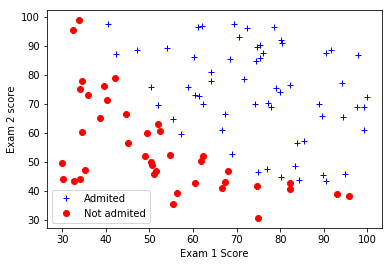

In [13]:
pos = np.where(Y == 1)[0]
neg = np.where(Y == 0)[0]
# print(pos)

plt.plot(X[pos][:, 0], X[pos][:, 1], 'b+', label='Admited')
plt.plot(X[neg][:, 0], X[neg][:, 1], 'ro', label='Not admited')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [24]:
def normalize(x):
    ones = np.ones((x.shape[0], 1))
    x_nor = np.concatenate((ones, x), axis=1)
    return x_nor
X_nor = normalize(X)
print(X_nor.shape)
# print(X_nor[0])

(100, 3)
[ 1.         34.62365962 78.02469282]


In [25]:
def sigmoid(x):
    return 1./(1 + np.exp(-x))

def predict(theta, x):
    return sigmoid(x.dot(theta))



In [26]:
theta_init = np.zeros((3, 1))
lr = .01
ite = 1000


In [27]:
def GD(theta_init, x, y, lr, ite):
    theta = theta_init
    for it in range(ite):
        theta = theta - lr * x.T.dot(predict(theta, x) - y) / x.shape[0]
    return theta

In [28]:
theta_op = GD(theta_init, X_nor, Y, lr, ite)
print(theta_op)

[[-0.76754116]
 [ 0.35868899]
 [-0.11012487]]


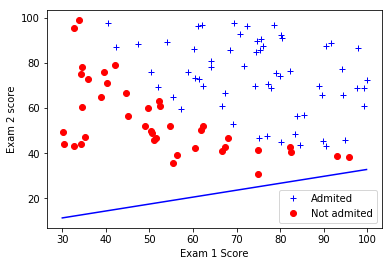

In [31]:
plt.plot(X[pos][:, 0], X[pos][:, 1], 'b+', label='Admited')
plt.plot(X[neg][:, 0], X[neg][:, 1], 'ro', label='Not admited')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 score')
plt.legend()
# plt.show()

x1plot = np.arange(30, 100, .2)
x2plot = (theta_op[0] + theta_op[2]*x1plot) / (-theta_op[1])
plt.plot(x1plot, x2plot, 'b-')
plt.show()